In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import Model, Parameter, report_fit

df = pd.read_csv("BhaWT_20210208.csv", comment='#')
df.columns = ['Lt','Y']
df


,Lt,Y
0,0.000000,0.000000
1,0.000005,0.038896
2,0.000015,0.146651
3,0.000025,0.333463
4,0.000035,0.372872
5,0.000045,0.568008
6,0.000055,0.596083
7,0.000065,0.691324
8,0.000075,0.800822
9,0.000085,0.902188


(0.0, 0.00013)

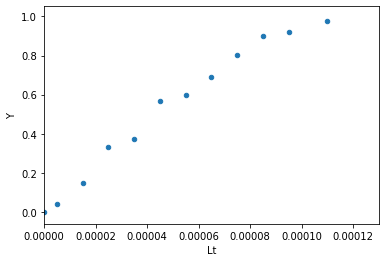

In [4]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

df.plot(x = 'Lt', y = 'Y', kind ='scatter')
plt.xlim([0.000000, 0.00013])

In [5]:
def quadratic(x, Mt, Kd):  
  return ((Kd+x+Mt)-((Kd+x+Mt)**2-4*x*Mt)**0.5)/(2*Mt)

model = Model(quadratic, independent_vars=['x'])
Kd=1e-7; Mt=6e-5
result = model.fit(df.Y, x=df.Lt, Kd=Kd, Mt=Mt)  

# fitted with both Kd and Mt against quadratic model. The valid result of Mt can be only accepted when fitted Kd is reasonable.

result.params.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Kd  1.058e-06     -inf      inf 5.422e-07     True     None     None
Mt  8.661e-05     -inf      inf 3.029e-06     True     None     None


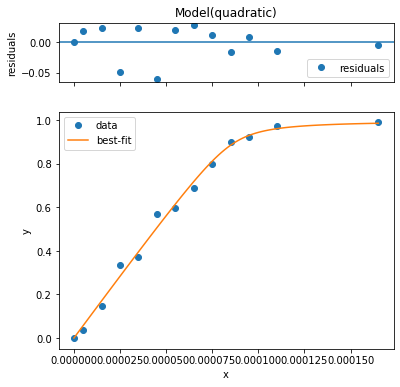

In [6]:
result.plot(numpoints=100)
plt.savefig('figure_massbalance.pdf', dpi=300)